In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_csv('sales.csv')

In [3]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [6]:
df.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

Distribution by Product Category:
 Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


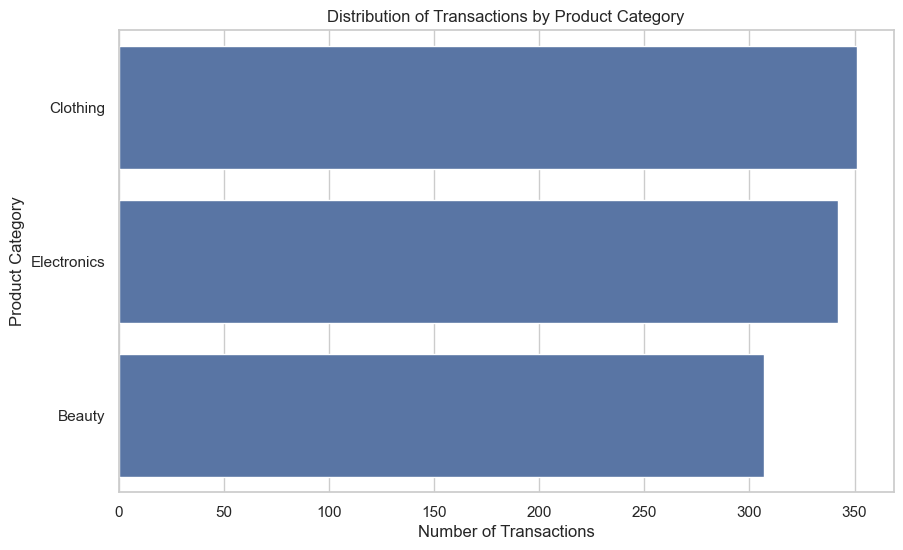

In [7]:
category_counts = df['Product Category'].value_counts()
print("Distribution by Product Category:\n", category_counts)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Product Category', order=category_counts.index)
plt.title('Distribution of Transactions by Product Category')
plt.xlabel('Number of Transactions')
plt.ylabel('Product Category')
plt.show()


Distribution by Day:
 Date
2023-01-01    3
2023-01-02    4
2023-01-03    1
2023-01-04    3
2023-01-05    3
             ..
2023-12-27    2
2023-12-28    3
2023-12-29    4
2023-12-31    1
2024-01-01    2
Name: count, Length: 345, dtype: int64


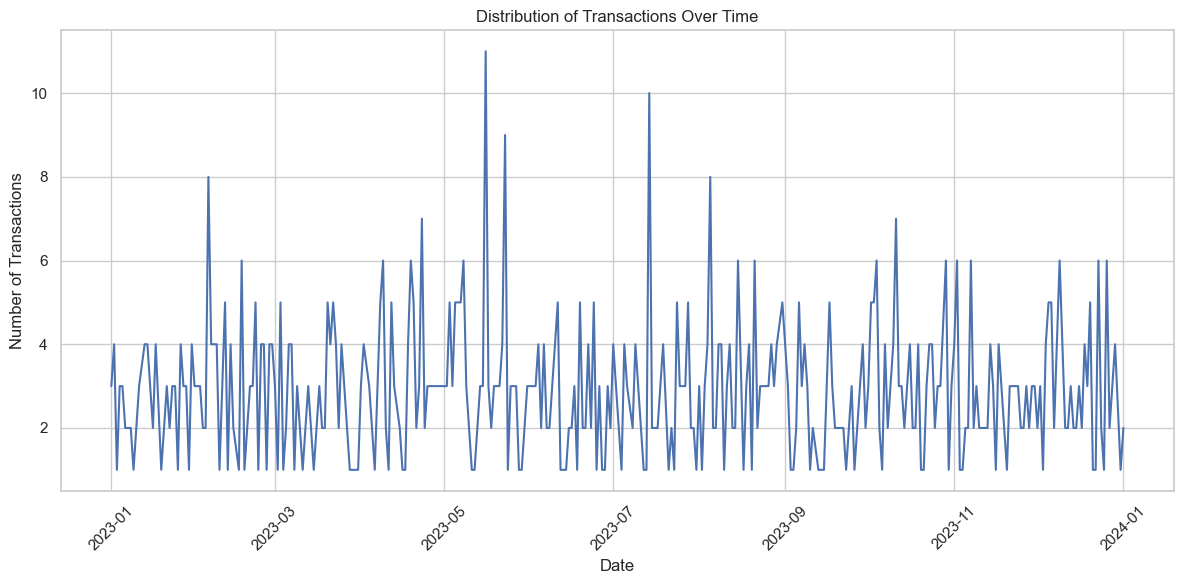

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

daily_counts = df['Date'].dt.date.value_counts().sort_index()
print("\nDistribution by Day:\n", daily_counts)

plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values)
plt.title('Distribution of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Distribution by Gender:
 Gender
Female    510
Male      490
Name: count, dtype: int64


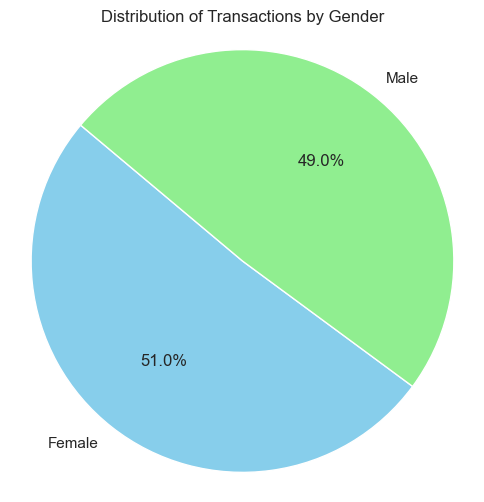

In [9]:
gender_counts = df['Gender'].value_counts()
print("\nDistribution by Gender:\n", gender_counts)

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Transactions by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

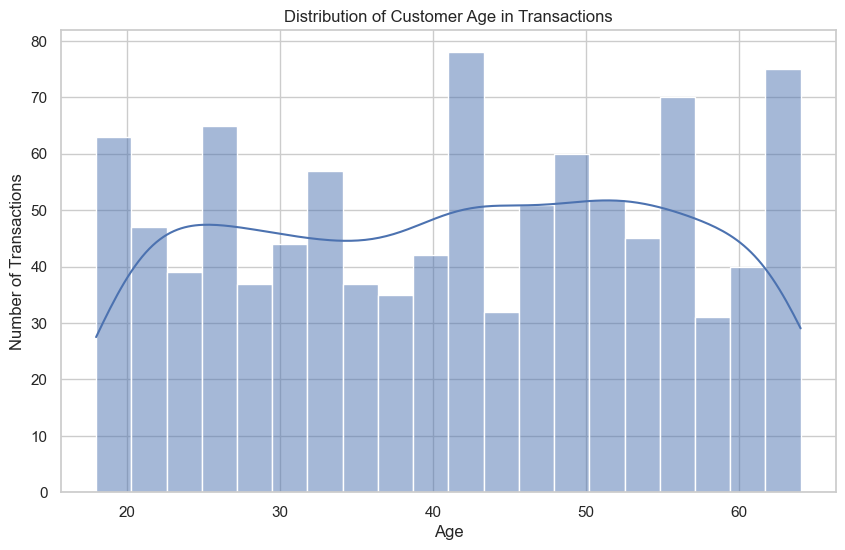

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Customer Age in Transactions')
plt.xlabel('Age')
plt.ylabel('Number of Transactions')
plt.show()

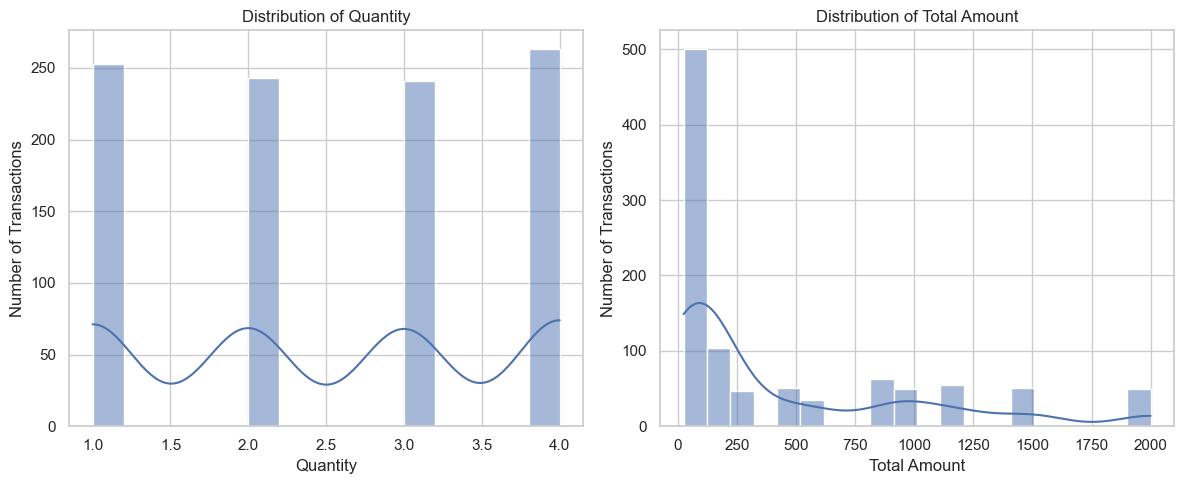

In [11]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Quantity'], bins=15, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Number of Transactions')

plt.subplot(1, 2, 2)
sns.histplot(df['Total Amount'], bins=20, kde=True)
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Number of Transactions')

plt.tight_layout()
plt.show()

Correlation Matrix:
                 Transaction ID       Age  Quantity  Price per Unit  \
Transaction ID        1.000000  0.065191 -0.026623       -0.060837   
Age                   0.065191  1.000000 -0.023737       -0.038423   
Quantity             -0.026623 -0.023737  1.000000        0.017501   
Price per Unit       -0.060837 -0.038423  0.017501        1.000000   
Total Amount         -0.075034 -0.060568  0.373707        0.851925   

                Total Amount  
Transaction ID     -0.075034  
Age                -0.060568  
Quantity            0.373707  
Price per Unit      0.851925  
Total Amount        1.000000  


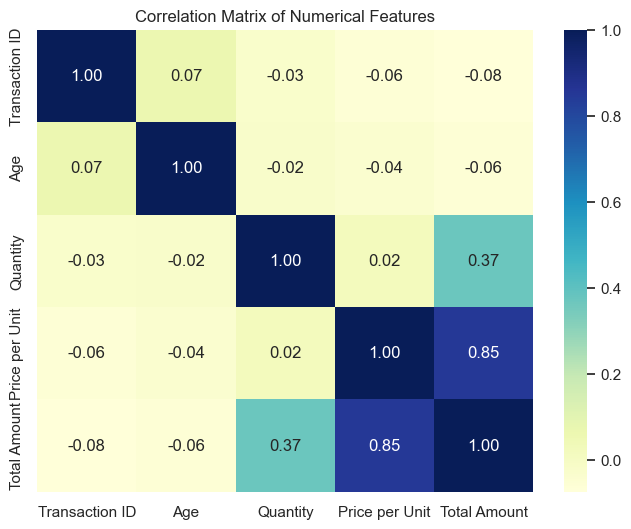

In [12]:
numerical_data = df[['Transaction ID', 'Age', 'Quantity', 'Price per Unit', 'Total Amount']]

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [13]:
categorical_data = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
print(categorical_data.tolist())


Categorical Columns:
['Customer ID', 'Gender', 'Product Category']


In [14]:
# Add a new column for Month
df['Month'] = df['Date'].dt.month_name()

# Display the first few rows to verify the new column
print("✔️ 'Month' column added successfully!")
print(df[['Date', 'Month']].head())
df.head(15)

✔️ 'Month' column added successfully!
        Date     Month
0 2023-11-24  November
1 2023-02-27  February
2 2023-01-13   January
3 2023-05-21       May
4 2023-05-06       May


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,November
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,February
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,January
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,May
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,May
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30,April
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50,March
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100,February
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600,December
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200,October


In [15]:
# Display the new shape and columns of the DataFrame
print("New Shape of df: ", df.shape)
print("Columns of df: ", df.columns)

New Shape of df:  (1000, 10)
Columns of df:  Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount',
       'Month'],
      dtype='object')


In [16]:
# Ensure 'Month' column is ordered correctly
df['Month'] = pd.Categorical(
    df['Month'],
    categories=['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True
)

# Aggregate total sales by month
monthly_sales = df.groupby('Month')['Total Amount'].sum().reset_index()

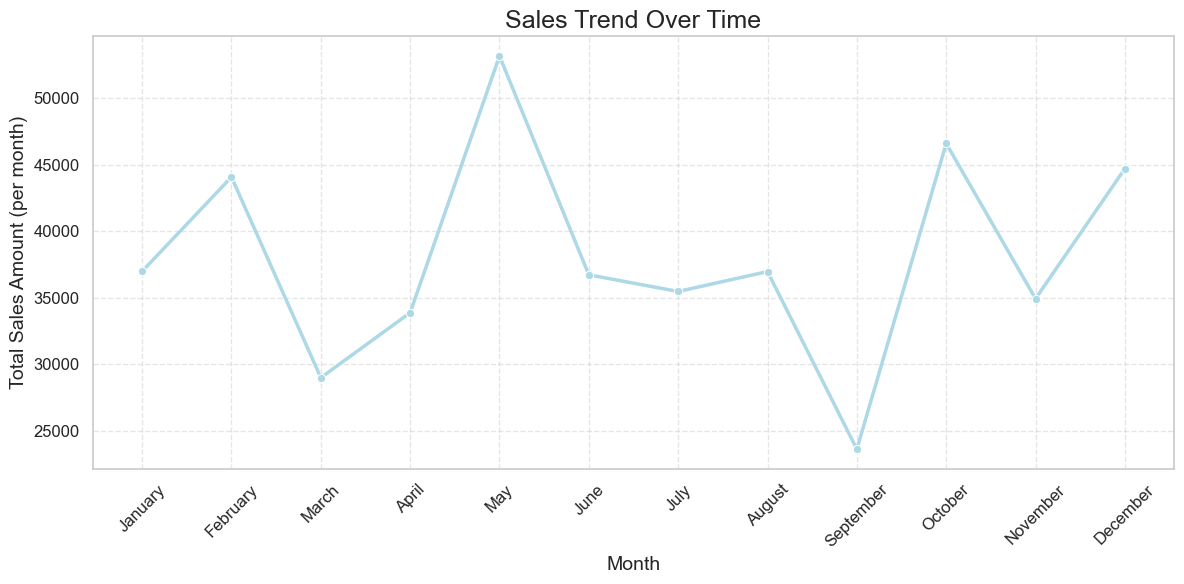

In [17]:
# Plot sales trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Total Amount', data=monthly_sales, marker='o', linewidth=2.5, color='lightblue')
plt.title('Sales Trend Over Time', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales Amount (per month)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()

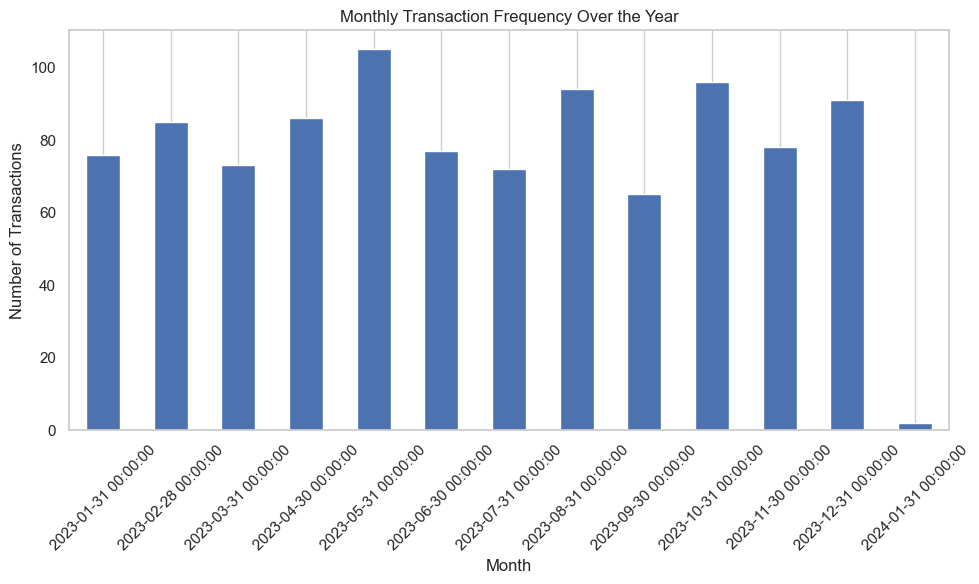

In [18]:
# Set 'Date' as the index
df.set_index('Date', inplace=True)

monthly_transactions = df.resample('M').size()
plt.figure(figsize=(10, 6))
monthly_transactions.plot(kind='bar')
plt.title('Monthly Transaction Frequency Over the Year')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [19]:
# Define age bins and renamed labels
age_bins = [0, 18, 25, 35, 50, 100]
age_labels = ['Child (0-18)', 'Youth (19-25)', 'Adult (26-35)', 'Middle-Aged (36-50)', 'Senior (50+)']

# Create a new column 'Age Group' with the age bins
df['Age Group'] = pd.cut(
    df['Age'], 
    bins=age_bins, 
    labels=age_labels, 
)

# Verify the creation of the 'Age Group' column
print("Age Group Binning Completed:")
print(df[['Age', 'Age Group']].head())
df.head()

Age Group Binning Completed:
            Age            Age Group
Date                                
2023-11-24   34        Adult (26-35)
2023-02-27   26        Adult (26-35)
2023-01-13   50  Middle-Aged (36-50)
2023-05-21   37  Middle-Aged (36-50)
2023-05-06   30        Adult (26-35)


,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Age Group
Date,,,,,,,,,,
2023-11-24,1,CUST001,Male,34,Beauty,3,50,150,November,Adult (26-35)
2023-02-27,2,CUST002,Female,26,Clothing,2,500,1000,February,Adult (26-35)
2023-01-13,3,CUST003,Male,50,Electronics,1,30,30,January,Middle-Aged (36-50)
2023-05-21,4,CUST004,Male,37,Clothing,1,500,500,May,Middle-Aged (36-50)
2023-05-06,5,CUST005,Male,30,Beauty,2,50,100,May,Adult (26-35)


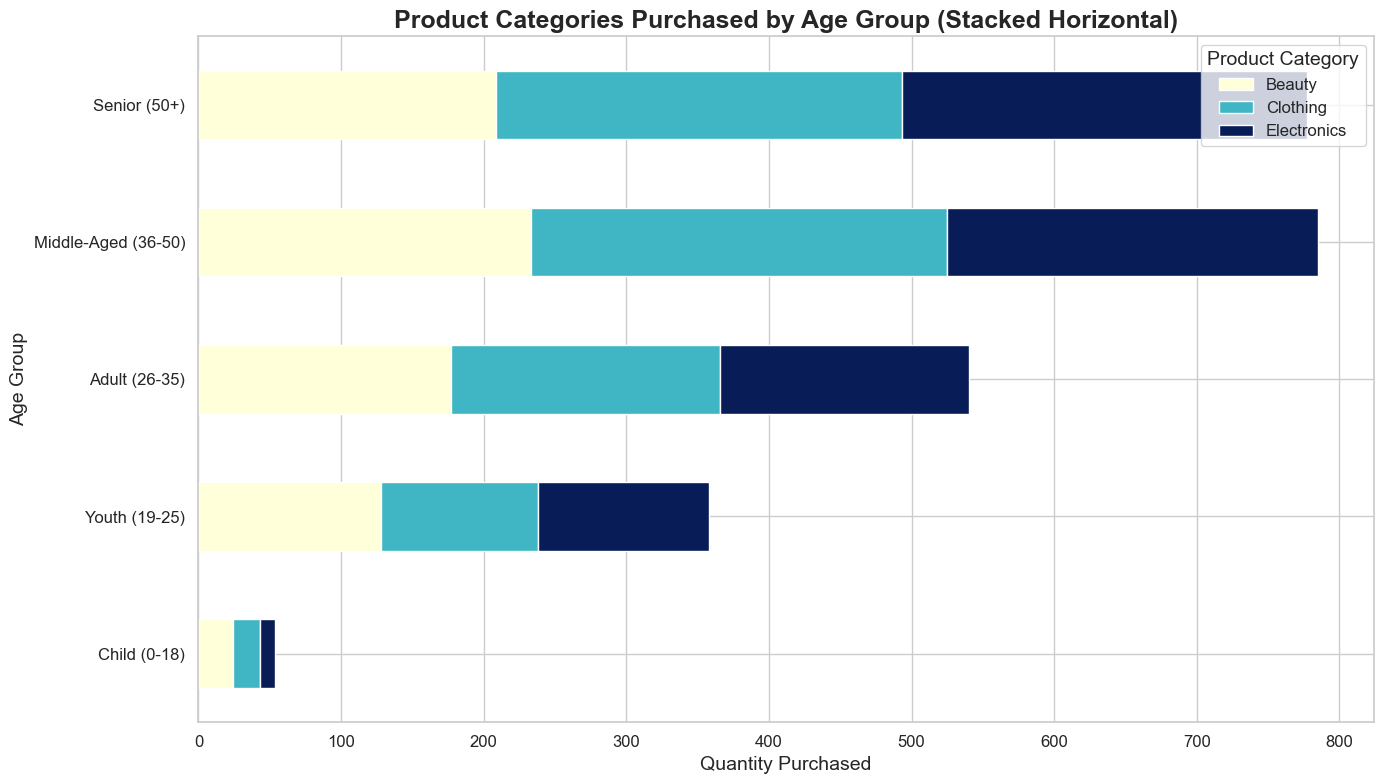

In [25]:
# Aggregate data by Age Group and Product Category
stacked_data = df.groupby(['Age Group', 'Product Category'])['Quantity'].sum().unstack()

# Plot the horizontal stacked bar chart
stacked_data.plot(
    kind='barh', 
    stacked=True, 
    figsize=(14, 8), 
    colormap='YlGnBu')  # Use a visually distinct colormap

# Add titles and labels
plt.title('Product Categories Purchased by Age Group (Stacked Horizontal)', fontsize=18, fontweight='bold')
plt.xlabel('Quantity Purchased', fontsize=14)
plt.ylabel('Age Group', fontsize=14)

# Customize tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend and customize
plt.legend(title='Product Category', title_fontsize=14, fontsize=12, loc='upper right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

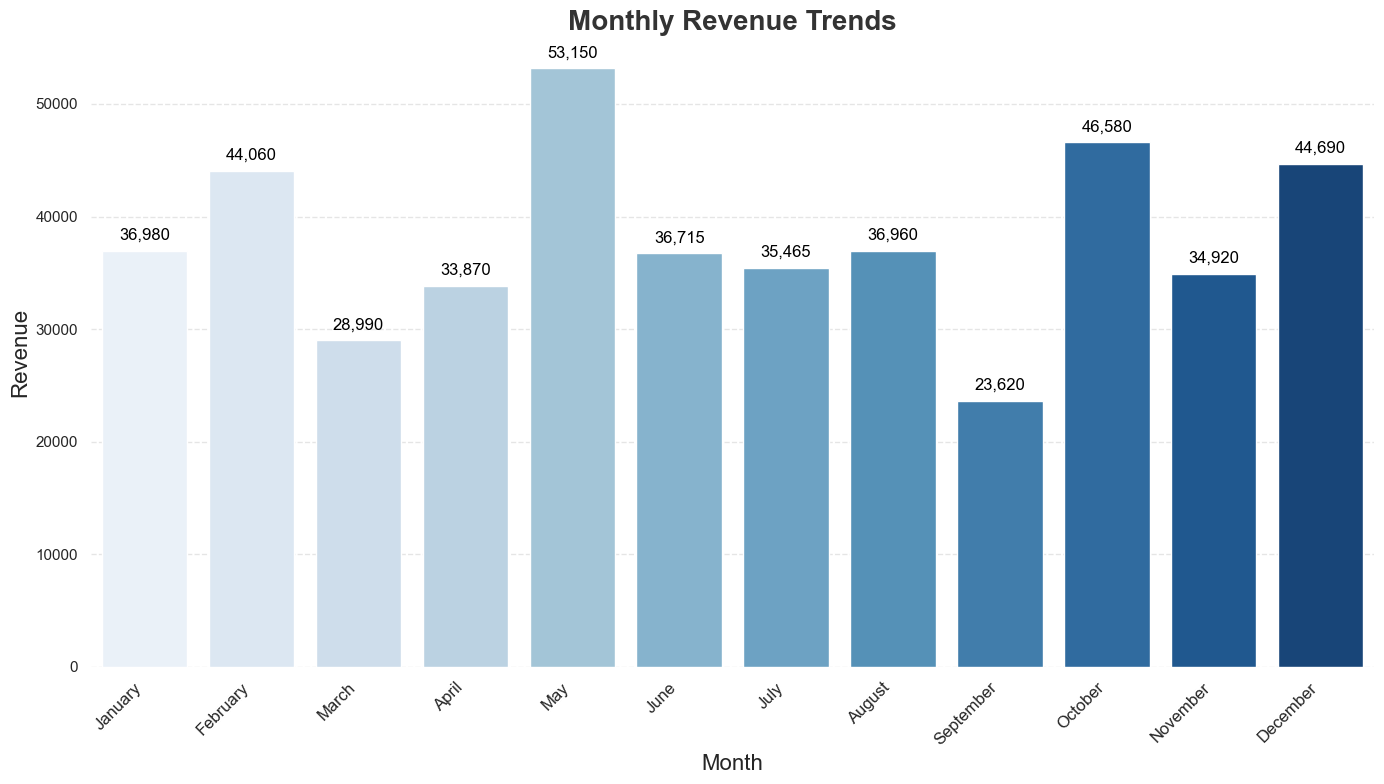

In [26]:
# Calculate monthly revenue totals
monthly_totals = df.groupby('Month')['Total Amount'].sum().reset_index()

# Ensure the months are ordered correctly
monthly_totals['Month'] = pd.Categorical(
    monthly_totals['Month'],
    categories=['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True
)

# Create the bar plot
plt.figure(figsize=(14, 8))
bars = sns.barplot(
    x='Month', 
    y='Total Amount', 
    data=monthly_totals, 
    palette='Blues'
)

# Add labels and title
plt.title('Monthly Revenue Trends', fontsize=20, fontweight='bold', color='#333333')
plt.xlabel('Month', fontsize=16)
plt.ylabel('Revenue', fontsize=16)

# Annotate bar values
for bar, total in zip(bars.patches, monthly_totals['Total Amount']):
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height() + 1000, 
        f"{total:,.0f}", 
        ha='center', 
        fontsize=12, 
        color='black'
    )

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add a subtle grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Remove unnecessary spines
sns.despine(left=True, bottom=True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()